In [24]:
import pandas as pd

brand_sales = pd.DataFrame([
    ['Moscow', 'Haval', 1300],
    ['Moscow', 'Chery', 800],
    ['Moscow', 'Geely', 250],
    ['Moscow', 'Toyota', 1500],
    ['Moscow', 'BMW', 900],

    ['St. Petersburg', 'Haval', 900],
    ['St. Petersburg', 'Chery', 650],
    ['St. Petersburg', 'Geely', 120],
    ['St. Petersburg', 'Toyota', 1400],
    ['St. Petersburg', 'BMW', 850],

    ['Kazan', 'Haval', 400],
    ['Kazan', 'Chery', 300],
    ['Kazan', 'Geely', 150],
    ['Kazan', 'Toyota', 500],
    ['Kazan', 'BMW', 300],

    ['Novosibirsk', 'Haval', 600],
    ['Novosibirsk', 'Chery', 350],
    ['Novosibirsk', 'Geely', 200],
    ['Novosibirsk', 'Toyota', 700],
    ['Novosibirsk', 'BMW', 400],
], columns=['city', 'brand', 'sales'])

brand_sales


,city,brand,sales
0,Moscow,Haval,1300
1,Moscow,Chery,800
2,Moscow,Geely,250
3,Moscow,Toyota,1500
4,Moscow,BMW,900
5,St. Petersburg,Haval,900
6,St. Petersburg,Chery,650
7,St. Petersburg,Geely,120
8,St. Petersburg,Toyota,1400
9,St. Petersburg,BMW,850


In [25]:
# Посчитать общие продажи каждого бренда.
brand_sales.groupby('brand')['sales'].sum()

brand
BMW       2450
Chery     2100
Geely      720
Haval     3200
Toyota    4100
Name: sales, dtype: int64

In [29]:
# Для каждого города вычислить долю продаж бренда от общих продаж этого города (в процентах).
sum_city = brand_sales.groupby('city')['sales'].sum()
print(sum_city)
brand_sales['percent'] =  round(brand_sales['sales'] /  brand_sales['city'].map(sum_city) * 100, 2)
brand_sales

city
Kazan             1650
Moscow            4750
Novosibirsk       2250
St. Petersburg    3920
Name: sales, dtype: int64


,city,brand,sales,percent
0,Moscow,Haval,1300,27.37
1,Moscow,Chery,800,16.84
2,Moscow,Geely,250,5.26
3,Moscow,Toyota,1500,31.58
4,Moscow,BMW,900,18.95
5,St. Petersburg,Haval,900,22.96
6,St. Petersburg,Chery,650,16.58
7,St. Petersburg,Geely,120,3.06
8,St. Petersburg,Toyota,1400,35.71
9,St. Petersburg,BMW,850,21.68


In [39]:
# Отсортировать города по доле самого популярного бренда.
brand_sales.groupby('city')['percent'].max().sort_values(ascending=False)

city
St. Petersburg    35.71
Moscow            31.58
Novosibirsk       31.11
Kazan             30.30
Name: percent, dtype: float64

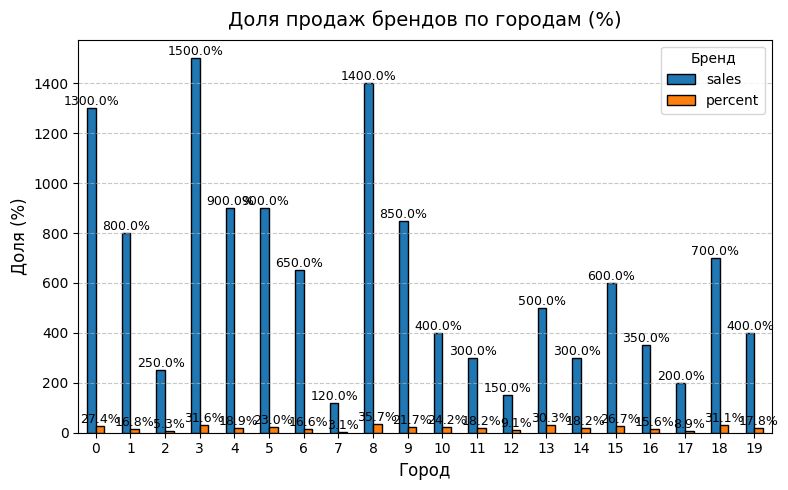

In [41]:
import matplotlib.pyplot as plt

# === Строим график ===
ax = brand_sales.plot(
    kind='bar',
    figsize=(8, 5),
    edgecolor='black'
)

plt.title('Доля продаж брендов по городам (%)', fontsize=14, pad=10)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Бренд')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи на столбцах
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

